In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Input
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv1D, Conv2D, Dense, Dropout, BatchNormalization, Flatten, MaxPooling2D, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [5]:
#download the weather images and put them in a directory
path = r'/Users/nancykray/Desktop/CF/Machine Learning /ClimateWins/Data Sets/Multi-class Weather Dataset'
folders = os.listdir(path)
print(folders)

['Cloudy', 'Rain', 'Shine', 'Sunrise']


In [6]:
# This will load in the pictures and rescale them to 250x250pixels

datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=12,
    subset='training',
)

test_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=12,
    subset='validation',
)

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


In [7]:
# This is a CNN to categorize the weather images

inputs = Input(shape=(250, 250, 3))

x = Conv2D(32, (5,5), activation = 'relu')(inputs)
x = MaxPooling2D(3,3)(x)
x = Conv2D(64, (5,5) , activation = 'relu')(x)
x = MaxPooling2D((3,3))(x)
x = Conv2D(128 , (5,5) , activation = 'relu')(x)
x = MaxPooling2D(3,3)(x)
x = Flatten()(x)
x = Dropout(0.5, seed = 5)(x)
x = Dense(128 , activation = 'relu')(x)

outputs = Dense(4, activation = 'softmax')(x)

model:Model = Model(inputs=inputs, outputs=outputs)

In [9]:
#compile and run the model
#how many epochs are required to generate an accurate model?

model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs = 43, #<----FILL THIS IN!
    steps_per_epoch = train_generator.n // train_generator.batch_size,
    validation_data = test_generator,
    validation_steps = test_generator.n // test_generator.batch_size,
)

Epoch 1/43
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 143ms/step - accuracy: 0.6519 - loss: 0.1057 - val_accuracy: 0.7269 - val_loss: 0.0933
Epoch 2/43
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - accuracy: 0.7500 - loss: 0.0898 - val_accuracy: 0.8750 - val_loss: 0.0619
Epoch 3/43


2024-10-07 17:27:38.153295: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/anaconda3/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)
2024-10-07 17:27:38.179329: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 143ms/step - accuracy: 0.7358 - loss: 0.0877 - val_accuracy: 0.7222 - val_loss: 0.1040
Epoch 4/43
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - accuracy: 0.9167 - loss: 0.0555 - val_accuracy: 0.6250 - val_loss: 0.1124
Epoch 5/43


2024-10-07 17:27:49.155722: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-07 17:27:49.179815: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 143ms/step - accuracy: 0.7985 - loss: 0.0729 - val_accuracy: 0.7500 - val_loss: 0.0918
Epoch 6/43
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - accuracy: 0.8333 - loss: 0.0847 - val_accuracy: 0.5000 - val_loss: 0.2171
Epoch 7/43


2024-10-07 17:28:00.171975: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-07 17:28:00.196839: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 143ms/step - accuracy: 0.7324 - loss: 0.1017 - val_accuracy: 0.8102 - val_loss: 0.0715
Epoch 8/43
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - accuracy: 0.8333 - loss: 0.0428 - val_accuracy: 0.6250 - val_loss: 0.1139
Epoch 9/43


2024-10-07 17:28:11.266713: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-07 17:28:11.290661: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 144ms/step - accuracy: 0.8313 - loss: 0.0608 - val_accuracy: 0.7176 - val_loss: 0.1180
Epoch 10/43
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - accuracy: 0.6667 - loss: 0.1235 - val_accuracy: 0.5000 - val_loss: 0.1995
Epoch 11/43


2024-10-07 17:28:22.495606: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-07 17:28:22.520008: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 146ms/step - accuracy: 0.8299 - loss: 0.0685 - val_accuracy: 0.8194 - val_loss: 0.0739
Epoch 12/43
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - accuracy: 0.9167 - loss: 0.0546 - val_accuracy: 1.0000 - val_loss: 9.2448e-04
Epoch 13/43


2024-10-07 17:28:33.845232: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-07 17:28:33.869709: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 144ms/step - accuracy: 0.8308 - loss: 0.0597 - val_accuracy: 0.7130 - val_loss: 0.1195
Epoch 14/43
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - accuracy: 0.8333 - loss: 0.0368 - val_accuracy: 0.7500 - val_loss: 0.0891
Epoch 15/43


2024-10-07 17:28:44.953073: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-07 17:28:44.977177: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 144ms/step - accuracy: 0.8446 - loss: 0.0611 - val_accuracy: 0.8102 - val_loss: 0.0691
Epoch 16/43
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - accuracy: 0.9167 - loss: 0.0495 - val_accuracy: 0.7500 - val_loss: 0.0872
Epoch 17/43


2024-10-07 17:28:56.041727: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-07 17:28:56.066244: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 145ms/step - accuracy: 0.8568 - loss: 0.0541 - val_accuracy: 0.7963 - val_loss: 0.0771
Epoch 18/43
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - accuracy: 0.8333 - loss: 0.0465 - val_accuracy: 0.7500 - val_loss: 0.0928
Epoch 19/43


2024-10-07 17:29:07.203150: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-07 17:29:07.228211: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 145ms/step - accuracy: 0.8609 - loss: 0.0549 - val_accuracy: 0.7870 - val_loss: 0.0823
Epoch 20/43
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - accuracy: 0.7500 - loss: 0.0437 - val_accuracy: 0.2500 - val_loss: 0.1842
Epoch 21/43


2024-10-07 17:29:18.380270: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-07 17:29:18.407302: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 145ms/step - accuracy: 0.8740 - loss: 0.0461 - val_accuracy: 0.8148 - val_loss: 0.0691
Epoch 22/43
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - accuracy: 0.8333 - loss: 0.0803 - val_accuracy: 0.6250 - val_loss: 0.1500
Epoch 23/43


2024-10-07 17:29:29.675242: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-07 17:29:29.700249: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 149ms/step - accuracy: 0.8773 - loss: 0.0460 - val_accuracy: 0.8426 - val_loss: 0.0638
Epoch 24/43
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - accuracy: 0.0000e+00 - loss: 0.2222 - val_accuracy: 0.6250 - val_loss: 0.1594
Epoch 25/43


2024-10-07 17:29:41.107493: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-07 17:29:41.132309: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 147ms/step - accuracy: 0.8011 - loss: 0.0845 - val_accuracy: 0.7685 - val_loss: 0.0895
Epoch 26/43
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - accuracy: 0.6667 - loss: 0.0894 - val_accuracy: 0.6250 - val_loss: 0.1308
Epoch 27/43


2024-10-07 17:29:52.474194: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-07 17:29:52.499754: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 147ms/step - accuracy: 0.9022 - loss: 0.0401 - val_accuracy: 0.7593 - val_loss: 0.0953
Epoch 28/43
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - accuracy: 0.8333 - loss: 0.0635 - val_accuracy: 0.6250 - val_loss: 0.1278
Epoch 29/43


2024-10-07 17:30:03.819558: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-07 17:30:03.843497: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 147ms/step - accuracy: 0.8804 - loss: 0.0451 - val_accuracy: 0.7685 - val_loss: 0.0882
Epoch 30/43
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - accuracy: 1.0000 - loss: 0.0053 - val_accuracy: 0.6250 - val_loss: 0.1224
Epoch 31/43


2024-10-07 17:30:15.354210: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-07 17:30:15.379745: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 147ms/step - accuracy: 0.8962 - loss: 0.0421 - val_accuracy: 0.8194 - val_loss: 0.0724
Epoch 32/43
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - accuracy: 0.7500 - loss: 0.1045 - val_accuracy: 1.0000 - val_loss: 0.0037
Epoch 33/43


2024-10-07 17:30:26.753914: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-07 17:30:26.779168: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 146ms/step - accuracy: 0.8897 - loss: 0.0447 - val_accuracy: 0.7917 - val_loss: 0.0681
Epoch 34/43
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - accuracy: 0.9167 - loss: 0.0273 - val_accuracy: 0.7500 - val_loss: 0.1096
Epoch 35/43


2024-10-07 17:30:38.060948: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-07 17:30:38.087327: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 146ms/step - accuracy: 0.8701 - loss: 0.0480 - val_accuracy: 0.8102 - val_loss: 0.0759
Epoch 36/43
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - accuracy: 0.8333 - loss: 0.0442 - val_accuracy: 0.8750 - val_loss: 0.0553
Epoch 37/43


2024-10-07 17:30:49.365735: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-07 17:30:49.390622: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 147ms/step - accuracy: 0.8914 - loss: 0.0354 - val_accuracy: 0.8333 - val_loss: 0.0656
Epoch 38/43
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - accuracy: 1.0000 - loss: 0.0054 - val_accuracy: 1.0000 - val_loss: 0.0032
Epoch 39/43


2024-10-07 17:31:00.715371: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-07 17:31:00.739960: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 147ms/step - accuracy: 0.8965 - loss: 0.0394 - val_accuracy: 0.7639 - val_loss: 0.0902
Epoch 40/43
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - accuracy: 0.8333 - loss: 0.0462 - val_accuracy: 1.0000 - val_loss: 3.1005e-05
Epoch 41/43


2024-10-07 17:31:12.013724: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-07 17:31:12.038890: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 145ms/step - accuracy: 0.9113 - loss: 0.0382 - val_accuracy: 0.8148 - val_loss: 0.0669
Epoch 42/43
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - accuracy: 0.7500 - loss: 0.0700 - val_accuracy: 0.7500 - val_loss: 0.0795
Epoch 43/43


2024-10-07 17:31:23.232321: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-07 17:31:23.257494: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 147ms/step - accuracy: 0.9086 - loss: 0.0379 - val_accuracy: 0.8565 - val_loss: 0.0606


In [10]:
results = pd.DataFrame(model.history.history)

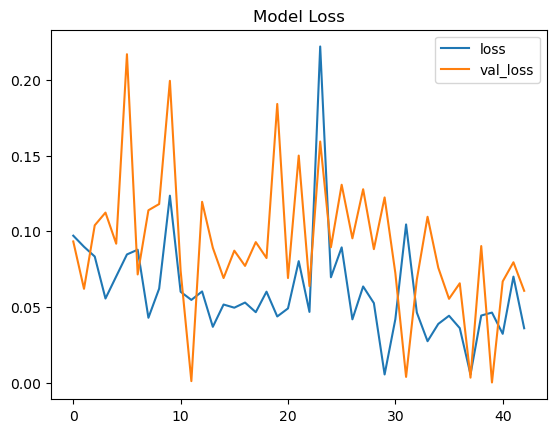

In [11]:
results[['loss','val_loss']].plot(title='Model Loss')
plt.savefig('./loss.png')

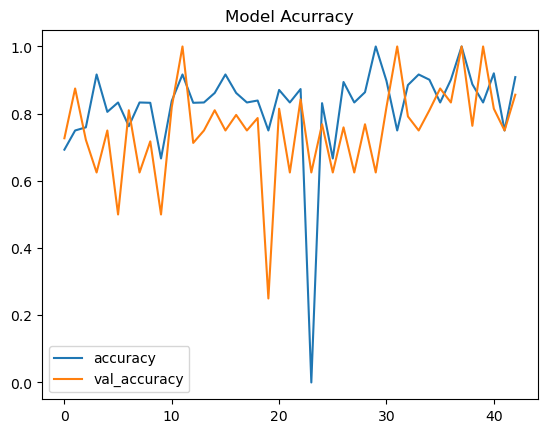

In [12]:
results[['accuracy','val_accuracy']].plot(title='Model Acurracy')
plt.savefig('./accuracy.png')

In [13]:
# Print the accuracy and loss
print("Accuracy: {}, Val_Accuracy: {}".format(results['accuracy'].iloc[-1], results['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results['loss'].iloc[-1], results['val_loss'].iloc[-1]))

Accuracy: 0.9088863730430603, Val_Accuracy: 0.8564814925193787
Loss: 0.035874705761671066, Val_Loss: 0.06063752621412277


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


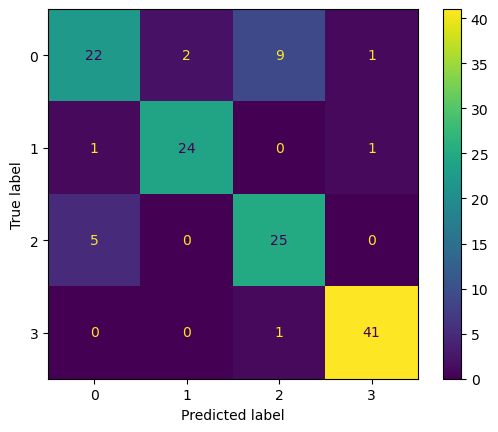

In [14]:
# collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 10 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

#Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [15]:
#This function will display a number of random images as well as the predictions for the type of weather.

def predict_one(model, num_images = None):  
    image_batch, classes_batch = next(test_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0] if num_images is None else num_images):
        image = image_batch[k]
        real_class = class_names[np.argmax(classes_batch[k])]
        predicted_class = class_names[np.argmax(predicted_batch[k])]
        value_predicted = predicted_batch[k]
        isTrue = (real_class == predicted_class)
        plt.figure(k)
        plt.title(str("Correct Prediction" if isTrue else "Incorrect Prediction") + ' - class: ' + real_class + ' - ' + 'predicted: ' + predicted_class + str(value_predicted))
        plt.axis('off')
        plt.savefig('./' + real_class + '_' + predicted_class + '_' + str(value_predicted) + '.png')
        plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


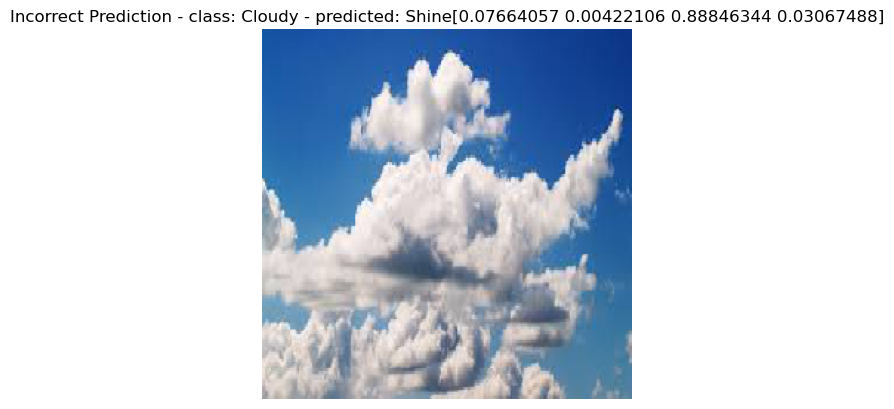

In [16]:
predict_one(model, 1) #<--you can show multiple pictures with this command. Just fill in the number you want to see.